# Pandas Solutions

First we need to import pandas and load the datafiles we want to use for the exercise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
soi_df = pd.read_csv('../../data/soi.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))
olr_df = pd.read_csv('../../data/olr.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))


C:\Users\tams00\AppData\Local\Temp\ipykernel_12156\1199920962.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))
C:\Users\tams00\AppData\Local\Temp\ipykernel_12156\1199920962.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))


Now that we have the data I will combine them into a single dataframe, as it was done in the Pandas-Intro notebook.

In [3]:
df = pd.DataFrame({'OLR': olr_df.Value,
                   'SOI': soi_df.Value})
df

,OLR,SOI
Date,,
1951-01-01,NaN,1.5
1951-02-01,NaN,0.9
1951-03-01,NaN,-0.1
1951-04-01,NaN,-0.3
1951-05-01,NaN,-0.7
...,...,...
2016-06-01,0.1,0.6
2016-07-01,0.5,0.4
2016-08-01,0.8,0.7


## Exercise: create a scatter plot

* You can use `df.plot` function with the appropriate keywords
* What happens if you use "c=" keyword?
* Pass another parameter: `edgecolors='none'`

There are two ways, which I will demonstrate:

### First method to create a scatter plot

<AxesSubplot:xlabel='OLR', ylabel='SOI'>

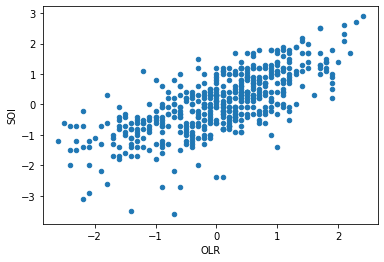

In [4]:
# your code here
# the first way is to define the scatter plot with an argument in .plot()
df.plot(kind = 'scatter', x = 'OLR', y = 'SOI')

Note that I had to specify with further arguments which coloumn of the dataframe is the x-axis, and which coloumn is the y-axis.

We can personalise the scatter plot even further using two of the colour arguments: 'c' and 'edgecolor':

<AxesSubplot:xlabel='OLR', ylabel='SOI'>

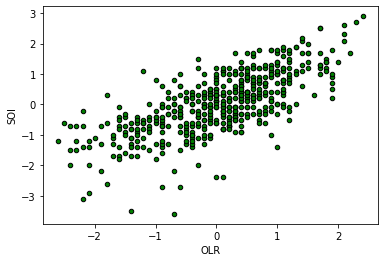

In [5]:
df.plot(kind = 'scatter', x = 'OLR', y = 'SOI', c = 'g', edgecolor = 'k')

As discussed in the teaching notebook, c can take on a range of different kinds of values, for example simple letters or words denoting a colour (e.g. 'g' or 'green') or a third variable with a colourmap (e.g. time). edgecolor defines the color of the edges of the data points, here we chose black, also given by the value 'k'.

### Second method to create a scatter plot

If you prefer to use methods instead of lots of arguments, this works also:

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

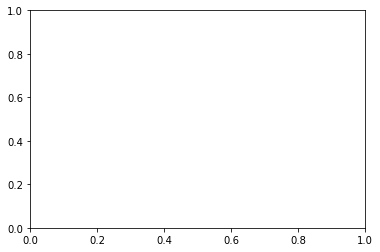

In [6]:
df.plot.scatter(x = 'OLR', y = 'SOI', c = 'magenta', edgecolor = '')

## Exercise: Rolling Function

**1. Subset data**

* Start by subsetting the SOI `DataFrame`
* Use either numerical indices, or, even better, datetime indices

Now to create the subset: say I want to specifically look at the SOI data over the decade 1975-1985:

In [10]:
# your code here
subset = df['SOI']['1975-01-01':'1985-01-01'] # I selected SOI specifically and used strings to denote the date range in the index.
subset

Date
1975-01-01   -0.5
1975-02-01    0.8
1975-03-01    1.6
1975-04-01    1.2
1975-05-01    0.6
             ... 
1984-09-01    0.1
1984-10-01   -0.3
1984-11-01    0.3
1984-12-01   -0.1
1985-01-01   -0.3
Freq: MS, Name: SOI, Length: 121, dtype: float64

In [11]:
# let's get an overview of the decade 
subset.describe()

count    121.000000
mean      -0.024793
std        1.044612
min       -3.600000
25%       -0.400000
50%        0.000000
75%        0.600000
max        2.100000
Name: SOI, dtype: float64

**2. Plot the subset data**

* You can create figure and axis using `matplotlib.pyplot`
* Or just use the `plot()` method of pandas `DataFrame`

<AxesSubplot:xlabel='Date'>

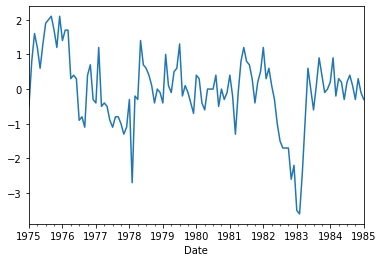

In [12]:
# your code here
subset.plot()

**3. Explore what `rolling()` method is**

* What does this method return?

We can do a variety of things with the rolling() function. The rolling() method itself will only return a Rolling object, we have to use an additional method to denote what computation we want:

In [9]:
roll_mean = subset.rolling(12).mean() # here I want to compute a rolling mean over a 12 point rolling window
# note that as the data points are recorded monthly, our window represents a year.
roll_mean

Date
1975-01-01         NaN
1975-02-01         NaN
1975-03-01         NaN
1975-04-01         NaN
1975-05-01         NaN
                ...   
1984-09-01    0.175000
1984-10-01    0.116667
1984-11-01    0.150000
1984-12-01    0.141667
1985-01-01    0.100000
Freq: MS, Name: SOI, Length: 121, dtype: float64

**4. Plot the original series and the smoothed series**

Now we can plot the rolled mean over the original subset:

In [ ]:
# your code here
subset.plot(label = 'Monthly SOI')
roll_mean.plot(label = '12 month-rolling mean SOI')
plt.title('SOI over 10 year period')
plt.legend()